In [4]:
import numpy as np
import keras as k
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense,merge, Add
from keras import optimizers
from keras.models import Model
import pandas as pd

Using TensorFlow backend.


In [5]:
random_ = np.loadtxt("./Filon/random.txt")
green_ = np.loadtxt("./Filon/green.txt")

In [6]:
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_[:,0]
X["beta"] = random_[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_[:,0]
Y["damu"] = green_[:,1]
Y["dbeta"] = green_[:,2]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [9]:
# scaler = Pre()
random_scale = preprocessing.MinMaxScaler([0,5])
green_scale = preprocessing.MinMaxScaler([0,5])

random_scale.fit(X_train)
green_scale.fit(y_train)
X_train = random_scale.transform(X_train)
X_test = random_scale.transform(X_test)

y_train = green_scale.transform(y_train)
y_test = green_scale.transform(y_test)

In [26]:
# Y1,Y2,Y3 =y_train[:,0],y_train[:,1],y_train[:,2]
# Y1_,Y2_,Y3_ =y_test[:,0],y_test[:,1],y_test[:,2]
Y1,Y2,Y3 =y_train["G"],y_train["damu"],y_train["dbeta"]
Y1_,Y2_,Y3_ =y_test["G"],y_test["damu"],y_test["dbeta"]

In [55]:
Y1,Y2,Y3 = Y1.reshape(Y1.size,1),Y2.reshape(Y2.size,1),Y3.reshape(Y3.size,1)
Y1_,Y2_,Y3_ = Y1_.reshape(Y1_.size,1),Y2_.reshape(Y2_.size,1),Y3_.reshape(Y3_.size,1)

In [7]:
# model = Sequential()
# model.add(Dense(100, input_dim=2, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation=None))

In [56]:
inputs = Input(shape=(2,))
x = Dense(8, activation='tanh')(inputs)
x = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
x_1 = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x_1)
# x = Dense(64, activation='relu')(x)




x1_ = Dense(64, activation='tanh')(x)
x1 = Dense(64, activation='tanh')(x1_)
x1 = Dense(64, activation='tanh')(x1)
x1 = Dense(64, activation='tanh')(x1)
x1 = Dense(64, activation='tanh')(x1)
# x = Dense(64, activation='relu')(x)
x1 = Add()([x1, x1_])
x1 = Dense(64, activation='tanh')(x)
y1 = Dense(1, activation=None)(x1)

x2_ = Dense(64, activation='tanh')(x)
x2 = Dense(64, activation='tanh')(x2_)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
# x = Dense(64, activation='relu')(x)
x2 = Add()([x2, x2_])
y2 = Dense(1, activation=None)(x2)

x3 = Dense(32, activation='tanh')(x)
x3 = Dense(10, activation='tanh')(x3)
y3 = Dense(1, activation=None)(x3)

model = Model(inputs=inputs, outputs=[y1,y2,y3])


In [57]:
sgd = optimizers.adam(lr=0.0001)


In [58]:
model.compile(loss=['mean_squared_error','mean_squared_error','mean_squared_error'], optimizer=sgd, metrics=['mae'])


In [59]:
history = model.fit([X_train], [Y1,Y2,Y3], epochs=20, batch_size=32,validation_data=([X_test],[Y1_,Y2_,Y3_]))

Train on 28440 samples, validate on 12189 samples
Epoch 1/20
28440/28440 [==============================] - 6s 220us/step - loss: 2.5548 - dense_36_loss: 1.0387 - dense_43_loss: 0.5767 - dense_46_loss: 0.9394 - dense_36_mean_absolute_error: 0.6415 - dense_43_mean_absolute_error: 0.4536 - dense_46_mean_absolute_error: 0.5845 - val_loss: 1.4406 - val_dense_36_loss: 0.5951 - val_dense_43_loss: 0.2622 - val_dense_46_loss: 0.5832 - val_dense_36_mean_absolute_error: 0.4911 - val_dense_43_mean_absolute_error: 0.3369 - val_dense_46_mean_absolute_error: 0.4208
Epoch 2/20
28440/28440 [==============================] - 5s 191us/step - loss: 1.2019 - dense_36_loss: 0.5220 - dense_43_loss: 0.1107 - dense_46_loss: 0.5692 - dense_36_mean_absolute_error: 0.4632 - dense_43_mean_absolute_error: 0.2223 - dense_46_mean_absolute_error: 0.4157 - val_loss: 1.0362 - val_dense_36_loss: 0.4250 - val_dense_43_loss: 0.0559 - val_dense_46_loss: 0.5553 - val_dense_36_mean_absolute_error: 0.4125 - val_dense_43_mean_

Epoch 17/20
28440/28440 [==============================] - 6s 217us/step - loss: 0.0010 - dense_36_loss: 3.0698e-04 - dense_43_loss: 2.5280e-04 - dense_46_loss: 4.6222e-04 - dense_36_mean_absolute_error: 0.0111 - dense_43_mean_absolute_error: 0.0108 - dense_46_mean_absolute_error: 0.0141 - val_loss: 6.6725e-04 - val_dense_36_loss: 1.6881e-04 - val_dense_43_loss: 2.1043e-04 - val_dense_46_loss: 2.8801e-04 - val_dense_36_mean_absolute_error: 0.0083 - val_dense_43_mean_absolute_error: 0.0114 - val_dense_46_mean_absolute_error: 0.0111
Epoch 18/20
28440/28440 [==============================] - 6s 225us/step - loss: 8.4412e-04 - dense_36_loss: 2.6269e-04 - dense_43_loss: 2.0327e-04 - dense_46_loss: 3.7816e-04 - dense_36_mean_absolute_error: 0.0103 - dense_43_mean_absolute_error: 0.0097 - dense_46_mean_absolute_error: 0.0128 - val_loss: 7.9970e-04 - val_dense_36_loss: 2.9333e-04 - val_dense_43_loss: 1.2264e-04 - val_dense_46_loss: 3.8373e-04 - val_dense_36_mean_absolute_error: 0.0099 - val_de

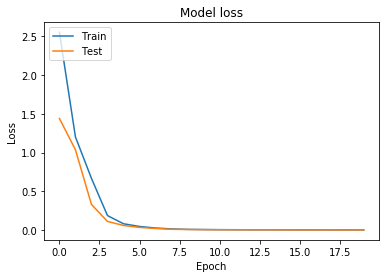

In [64]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [61]:
input_ = random_scale.transform(X)
output_ = model.predict(input_)

In [62]:
output_ = np.transpose(np.array(output_))
output_ = green_scale.inverse_transform(output_.reshape(output_.shape[1],3))


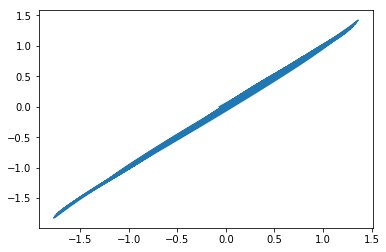

In [63]:
plt.plot(output_[:,2],green_[:,2])

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [36]:
regr = RandomForestRegressor(max_depth=2000, random_state=0,
                             n_estimators=1000)
regr.fit(X_train, Y1)  
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [40]:
(np.sum(np.square(regr.predict(X_test)-Y1_)))

0.047833444514077325